# Testing VAE with Single Point Dataset

## Testing Variational Autoencoder (VAE)

In [27]:
from autoencoders.VAE import VAEBallTrackNoPaddle as VAE
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [28]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [29]:
dataset, validation = generate_single_point(10, 10, validation_split=0.20)
INPUT_SHAPE = dataset.shape[1:]
DATASET_SIZE = dataset.shape[0]
VALIDATION_SIZE = validation.shape[0]
print(dataset.shape)
print(validation.shape)

(80, 10, 10, 1)
(20, 10, 10, 1)


In [30]:
vae = VAE(
    layers=2,
    input_shape=INPUT_SHAPE,
    latent_size=8,
    filters=8,
    kernel_size=3,
    name="VAE")
vae.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_encoder (InputLayer)      [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv1_enc (Conv2D)              (None, 10, 10, 8)    80          input_encoder[0][0]              
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 5, 5, 8)      0           conv1_enc[0][0]                  
__________________________________________________________________________________________________
conv2_enc (Conv2D)              (None, 5, 5, 16)     1168        maxpool1[0][0]                   
____________________________________________________________________________________________

In [31]:
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=50)
]

batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

history = vae.train_primitive(
    dataset, 
    validation, 
    epochs=400,
    batch_size=batch_size,
    callbacks=callbacks
)

41ms/step - loss: 3.4393 - kl_loss: 0.6321 - ball_loss: 2.8688 - val_loss: 3.7724 - val_kl_loss: 0.5602 - val_ball_loss: 3.2122
Epoch 293/400
3/3 [==============================] - 0s 39ms/step - loss: 3.4841 - kl_loss: 0.6131 - ball_loss: 2.9142 - val_loss: 3.9387 - val_kl_loss: 0.5508 - val_ball_loss: 3.3878
Epoch 294/400
3/3 [==============================] - 0s 37ms/step - loss: 3.3807 - kl_loss: 0.6232 - ball_loss: 2.7118 - val_loss: 3.7909 - val_kl_loss: 0.5660 - val_ball_loss: 3.2250
Epoch 295/400
3/3 [==============================] - 0s 40ms/step - loss: 3.4314 - kl_loss: 0.6344 - ball_loss: 2.6154 - val_loss: 4.0958 - val_kl_loss: 0.5768 - val_ball_loss: 3.5189
Epoch 296/400
3/3 [==============================] - 0s 45ms/step - loss: 3.1765 - kl_loss: 0.6535 - ball_loss: 2.7548 - val_loss: 3.7275 - val_kl_loss: 0.5740 - val_ball_loss: 3.1535
Epoch 297/400
3/3 [==============================] - 0s 38ms/step - loss: 3.6912 - kl_loss: 0.6291 - ball_loss: 3.0036 - val_loss: 3.487

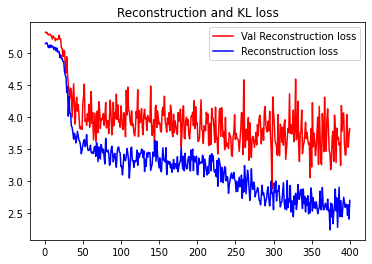

In [32]:
val_rec_loss = history.history['val_loss']
rec_loss = history.history['ball_loss']

epochs = range(1, len(val_rec_loss) + 1)    

plt.plot(epochs, val_rec_loss, 'r', label='Val Reconstruction loss')
plt.plot(epochs, rec_loss, 'b', label='Reconstruction loss')
plt.title('Reconstruction and KL loss')
plt.legend()

In [33]:
print(VALIDATION_SIZE)

20


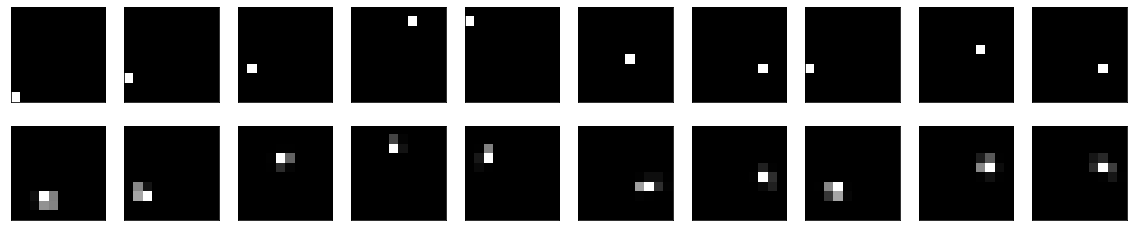

In [34]:
import random
import numpy as np

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, VALIDATION_SIZE-1)
    images[i] = dataset[rand_img]

decoded_imgs = vae.predict(images)
#latent = vae.encoder.predict(images)

#decoded_imgs = vae.decoder.predict(latent[:][2])

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()